In [1]:
! pip install kaggle

Menginstall library kaggle.

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Membuat direktori dengan nama ".kaggle".

In [3]:
! cp kaggle.json ~/.kaggle/

Copy "kaggle.json" ke dalam direktori yang telah dibuat. 

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

Mengalokasikan izin yang diperlukan untuk file tersebut.

In [5]:
# Mendownload dan menyiapkan dataset 
! kaggle datasets download iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 27.0MB/s]


Mendownload dataset mobile price classification.

In [6]:
# Mengekstrak zip file
import zipfile

local_zip = '/content/mobile-price-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

Melakukan ekstraksi pada file dengan ekstensi zip agar dataset yang diperlukan dapat digunakan.

In [7]:
# Mengubah dataset menjadi dataframe
import pandas as pd

df = pd.read_csv('/content/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


Melihat dataset dengan menampilkan lima sampel awal dari dataset pada dataframe.

Deskripsi variabel:
1. battery_power = energi total yang dapat disimpan baterai dalam satu waktu diukur dalam mAh
2. blue = ada tidaknya bluetooth
3. clock_speed = kecepatan di mana mikroprosesor mengeksekusi instruksi
4. dual_sim = mendukung dual sim atau tidak
5. fc = front camera dalam mega pixels
6. four_g = mendukung 4G atau tidak
7. int_memory = kapasitas internal memori dalam Gigabytes
8. m_dep = kedalaman hp dalam cm
9. mobile_wt = berat hp 
10. n_cores = jumlah cores dari processor
11. pc = kamera utama dalam mega pixels
12. px_height = tinggi resolusi pixel
13. px_width = lebar resolusi pixel
14. ram = jumlah ram dalam Mega Bytes
15. sc_h = tinggi layar ponsel dalam cm
16. sc_w = lebar layar ponsel dalam cm
17. talk_time = waktu terlama satu kali pengisian baterai akan bertahan saat terakhir kali Anda berada
18. three_g = mendukung 3G atau tidak
19. touch_screen = mendukung layar sentuh atau tidak
20. wifi = mendukung wifi atau tidak
21. price_range = variabel target dengan nilai 0 (biaya rendah), 1 (biaya sedang), 2 (biaya tinggi) dan 3 (biaya sangat tinggi)

In [8]:
# Melihat informasi mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Melihat informasi yang ada pada dataset. Terlihat bahwasanya dataset memiliki 2000 sampel.

In [9]:
# Melihat deskripsi statistik dataset
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Melihat deskripsi statistik pada dataset. Dapat menjadi catatan, bahwasanya tidak akan rasional apabila nilai pada px_height, px_width, sc_h, sc_w sama dengan 0. Karena nilai-nilai yang ada pada variabel tersebut merepresentasikan dimensi layar hp.

In [10]:
# Melihat apakah ada missing value pada dataset
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Melihat apakah ada atau tidaknya missing value pada dataset. Terlihat bahwasanya tidak ada missing value pada dataset.

In [11]:
# Memeriksa rasionalitas beberapa variabel
px_h = (df.px_height==0).sum()
px_w = (df.px_width==0).sum()
sc_h = (df.sc_h==0).sum()
sc_w = (df.sc_w==0).sum()

Memeriksa rasionalitas beberapa variabel, hal ini diperlukan untuk melihat ada atau tidaknya nilai pada variabel yang tidak rasional.

In [12]:
print(px_h)
print(px_w)
print(sc_h)
print(sc_w)

2
0
0
180


In [13]:
# Menghapus nilai yang tidak rasional pada variabel
df = df.loc[(df[['px_height','sc_w']]!=0).all(axis=1)]
df.shape

(1819, 21)

Tersisa 1819 sampel setelah menghilangkan sampel yang mengandung variabel dengan nilai yang tidak rasional.

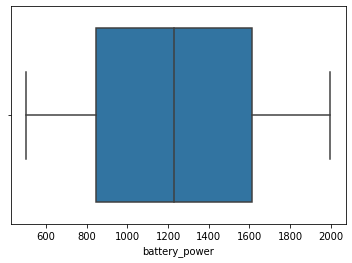

In [14]:
# Menangani Outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada tiap variabel
import seaborn as sns

sns.boxplot(x=df['battery_power'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel battery_power.

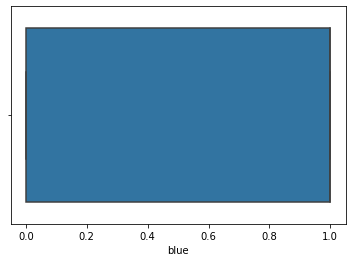

In [15]:
sns.boxplot(x=df['blue'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel blue.

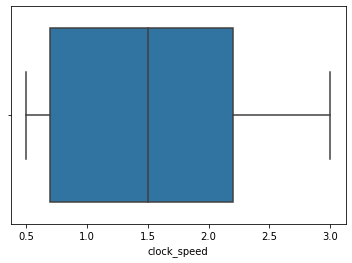

In [16]:
sns.boxplot(x=df['clock_speed'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel clock_speed.

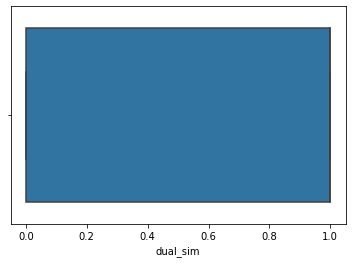

In [17]:
sns.boxplot(x=df['dual_sim'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel dual_sim.

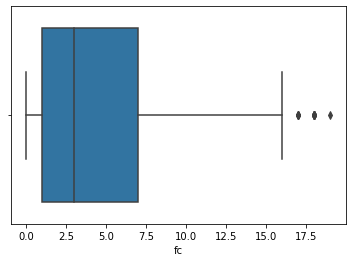

In [18]:
sns.boxplot(x=df['fc'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel fc.

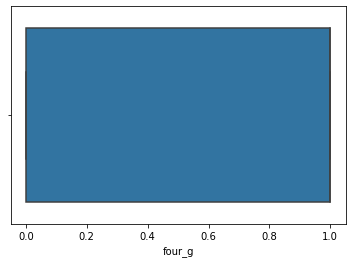

In [19]:
sns.boxplot(x=df['four_g'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel four_g.

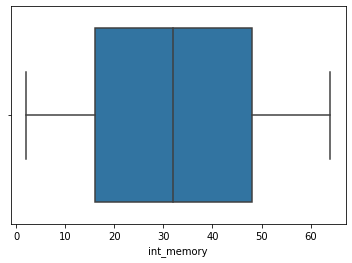

In [20]:
sns.boxplot(x=df['int_memory'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel int_memory.

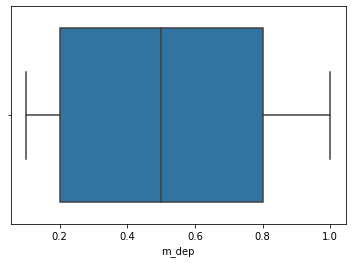

In [21]:
sns.boxplot(x=df['m_dep'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel m_dep.

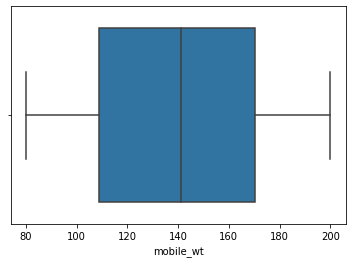

In [22]:
sns.boxplot(x=df['mobile_wt'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel mobile_wt.

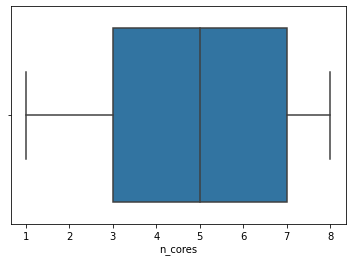

In [23]:
sns.boxplot(x=df['n_cores'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel n_cores.

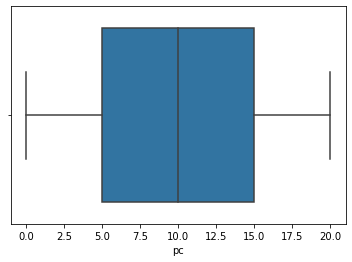

In [24]:
sns.boxplot(x=df['pc'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel pc.

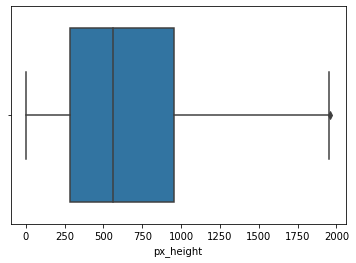

In [25]:
sns.boxplot(x=df['px_height'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel px_height.

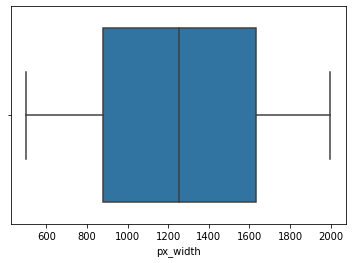

In [26]:
sns.boxplot(x=df['px_width'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel px_width.

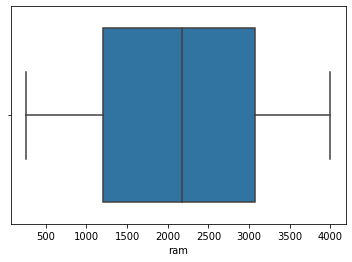

In [27]:
sns.boxplot(x=df['ram'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel ram.

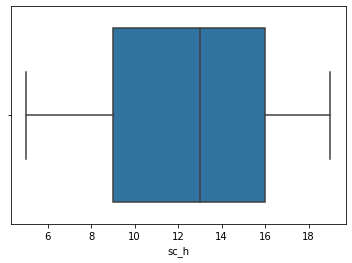

In [28]:
sns.boxplot(x=df['sc_h'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel sc_h.

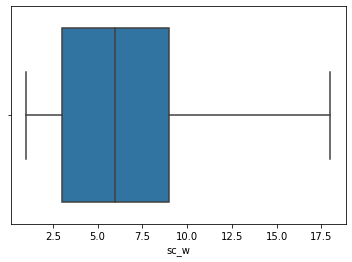

In [29]:
sns.boxplot(x=df['sc_w'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel sc_w.

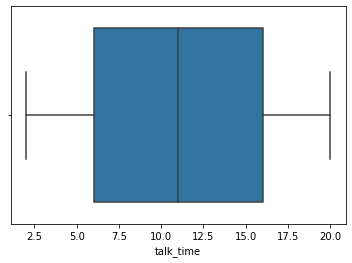

In [30]:
sns.boxplot(x=df['talk_time'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel talk_time.

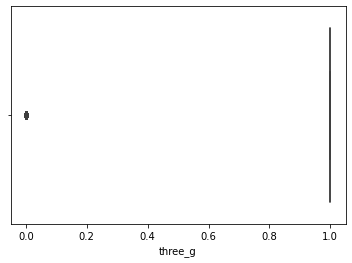

In [31]:
sns.boxplot(x=df['three_g'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel three_g.

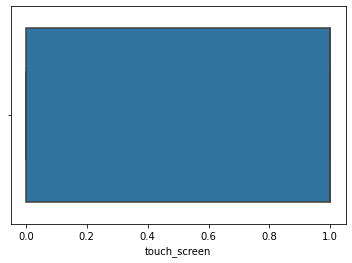

In [32]:
sns.boxplot(x=df['touch_screen'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel touch_screen.

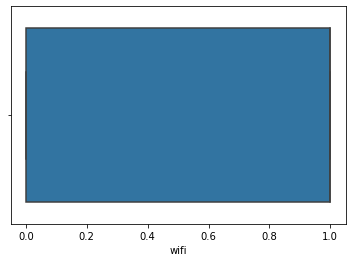

In [33]:
sns.boxplot(x=df['wifi'])

Melihat ada tidaknya outliers dengan IQR Method dan menggunakan boxplot untuk visualisasi pada variabel wifi.

In [34]:
# Proses drop outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah outliers didrop
df.shape

(1368, 21)

Melakukan drop outliers. Terdapat 1368 sampel setelah melakukan drop pada sampel yang memiliki outliers.

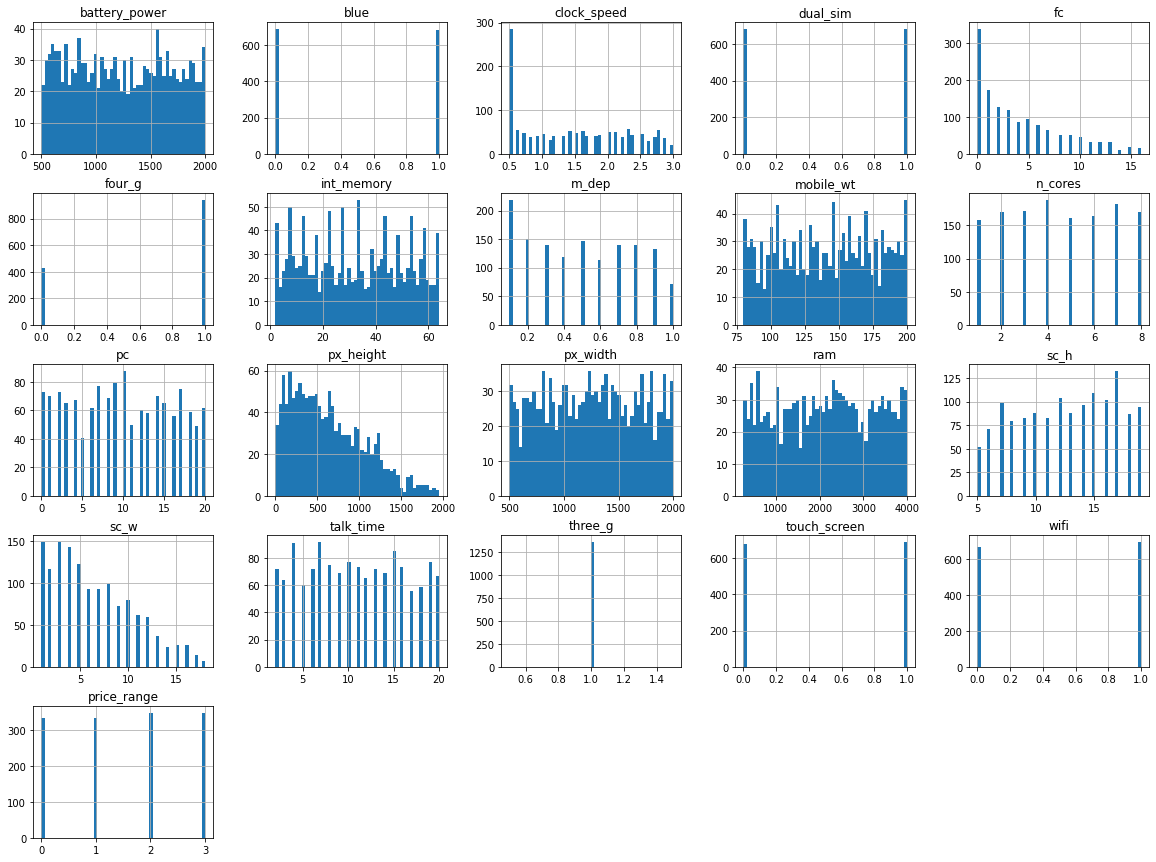

In [35]:
# Melakukan proses analisis data dengan teknik Univariate EDA
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins=50, figsize=(20,15))
plt.show()

In [36]:
l_three = (df.price_range==3).sum()
l_two = (df.price_range==2).sum()

print(l_three)
print(l_two)

350
348


Dari histogram di atas, terdapat informasi bahwasanya pada tiap label/target price_range jumlahnya tidak berbeda secara signifikan, dengan kata lain, hal tersebut bisa dikatakan proporsional. Jumlah tertinggi ada pada target 3 (biaya sangat tinggi).

In [37]:
# Menemukan variabel penting dengan scikit-learn menggunakan model random forest
from sklearn.model_selection import train_test_split

b = df['price_range'] 


li = list(df.columns.values[:20])
a = df[li]

# Split dataset menjadi train dan test
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=123)

Menemukan variabel penting dengan scikit-learn menggunakan model random forest yang telah dilatih oleh train test sementara.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf=RandomForestClassifier(n_estimators=100)

clf.fit(a_train,b_train)

y_pred=clf.predict(a_test)


print("Accuracy:",metrics.accuracy_score(b_test, y_pred))

Accuracy: 0.8211678832116789


Akurasi yang didapat kurang mumpuni, maka dari itu dilakukan pengambilan variabel penting untuk optimalisasi akurasi.

In [39]:
var_imp = pd.Series(clf.feature_importances_,index=list(df.columns.values[:20])).sort_values(ascending=False)
var_imp

ram              0.451593
battery_power    0.071923
px_height        0.059569
px_width         0.055072
mobile_wt        0.042559
int_memory       0.040802
pc               0.033039
talk_time        0.033002
clock_speed      0.032892
sc_h             0.032204
sc_w             0.032198
m_dep            0.026861
fc               0.025693
n_cores          0.023905
wifi             0.008265
touch_screen     0.008193
four_g           0.007834
dual_sim         0.007555
blue             0.006840
three_g          0.000000
dtype: float64

Melihat skor kepentingan variabel terhadap dataset.

No handles with labels found to put in legend.


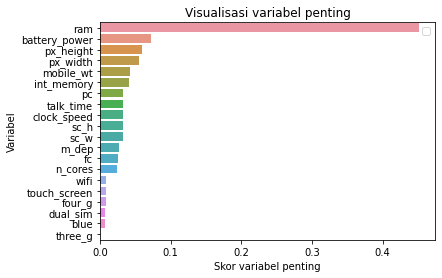

In [40]:
# Membuat bar plot
sns.barplot(x=var_imp, y=var_imp.index)
plt.xlabel('Skor variabel penting')
plt.ylabel('Variabel')
plt.title('Visualisasi variabel penting')
plt.legend()
plt.show()

Memvisualisasikan skor kepentingan variabel. Terlihat bahwasanya ram merupakan variabel yang sangat penting. Kemudian ambil beberapa variabel penting lainnya dengan tolak ukur relatif berdasarkan spesifikasi, maka diambil beberapa variabel penting, yaitu ram, battery_power, px_width, px_height, mobile_wt, dan int_memory.

In [41]:
from sklearn.model_selection import train_test_split

y = df['price_range'] 

# Ambil fitur penting
X = df[['px_width', 'px_height', 'battery_power', 'ram', 'mobile_wt', 'int_memory']]
# Split dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Melakukan pembagian dataset terhadap variabel penting menjadi train test. Kemudian akan diterapkan pada tiga model yang mana pada akhirnya dilakukan evaluasi untuk memilih model yang optimal.

In [42]:
print(X_test.shape)
print(X_train.shape)

(274, 6)
(1094, 6)


Data train memiliki 1094 sampel, sedangkan data test memiliki 274 sampel dengan pembagian 80:20.

In [43]:
# Model KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

a_KNN = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",a_KNN)

Accuracy: 0.9197080291970803


Pada model KNN diambil jumlah tetangganya bernilai 9. karena tidak ada metode terkhusus dalam memilih jumlah nilai tetangga, maka dilakukan metode intuisi dengan mengambil jumlah nilai tetangga ganjil terhadap kelas yang genap.

In [44]:
# Model AdaBoost dengan base estimator svc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics

svc=SVC(probability=True, kernel='linear')
abc = AdaBoostClassifier(n_estimators=50,
                         base_estimator=svc,
                         learning_rate=1)

model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

a_AdBoost = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",a_AdBoost)

Accuracy: 0.9635036496350365


Pada model AdaBoost digunakan base_estimator svc untuk optimalisasi yang mana sebelumnya secara default menggunakan Decision Tree.

In [45]:
# Model random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

a_RF = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",a_RF)

Accuracy: 0.8978102189781022


Pada model Random Forest dilakukan optimalisasi sebelumnya dengan mengambil variabel-variabel penting.

Text(0, 0.5, 'Score')

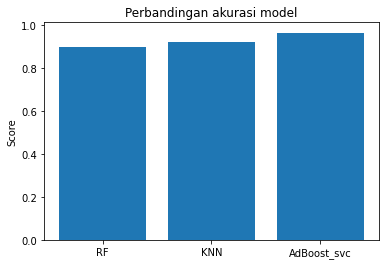

In [46]:
kump_model = {'RF': a_RF, 'KNN': a_KNN, 'AdBoost_svc': a_AdBoost}
keys = kump_model.keys()
values = kump_model.values()

plt.bar(keys, values)
plt.title('Perbandingan akurasi model')
plt.ylabel('Score')

Dari visualisasi yang ada terdapat interpretasi bahwasanya tiap model tidak terlalu berbeda secara signifikan terhadap skor akurasi. Namun, dari ketiga model yang ada, model AdaBoostlah yang paling optimal dengan memberikan skor akurasi di atas 95%. Maka pada kasus klasifikasi rentang harga hp ini dapat disimpulkan bahwa penggunaan model AdaBoost sangat optimal.